# Litecoin Option

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [6]:
LTC = yf.download("LTC-USD", start="2021-03-15", end="2022-03-15") #To import data for a period of one year from 15 Mar 2021 to 15 mar 2022

[*********************100%***********************]  1 of 1 completed


In [7]:
LTC #to display the movement of the 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-15,215.227280,221.686401,198.752548,201.264618,201.264618,6186375403
2021-03-16,201.191208,204.864395,192.191803,201.040634,201.040634,5270029739
2021-03-17,201.064163,206.287430,195.025864,206.067932,206.067932,4362001168
2021-03-18,206.033142,208.096375,200.103027,200.537308,200.537308,3719561575
2021-03-19,200.499222,205.343719,196.953781,201.063721,201.063721,2807932048
...,...,...,...,...,...,...
2022-03-11,102.649483,106.566574,100.503815,104.965355,104.965355,764305866
2022-03-12,104.964760,107.766373,104.807281,105.832397,105.832397,536251476
2022-03-13,105.812271,107.201889,101.904175,102.114799,102.114799,535011513


In [8]:
LTC_Close =  LTC['Adj Close'] #To save the column Adj Close in our table above into a new variable called LTC_Close,
#as we intersted in ajdusted closing prices to describe and plot below
LTC_Close.head()

Date
2021-03-15    201.264618
2021-03-16    201.040634
2021-03-17    206.067932
2021-03-18    200.537308
2021-03-19    201.063721
Name: Adj Close, dtype: float64

In [9]:
LTC_Close.describe().round(4) #To display descriptive statistics of the adjusted closing prices

count    366.0000
mean     175.6103
std       53.7657
min       98.8693
25%      137.3709
50%      169.0508
75%      197.3887
max      386.4508
Name: Adj Close, dtype: float64

Text(0.5, 1.0, 'Historical Price for LTC-USD')

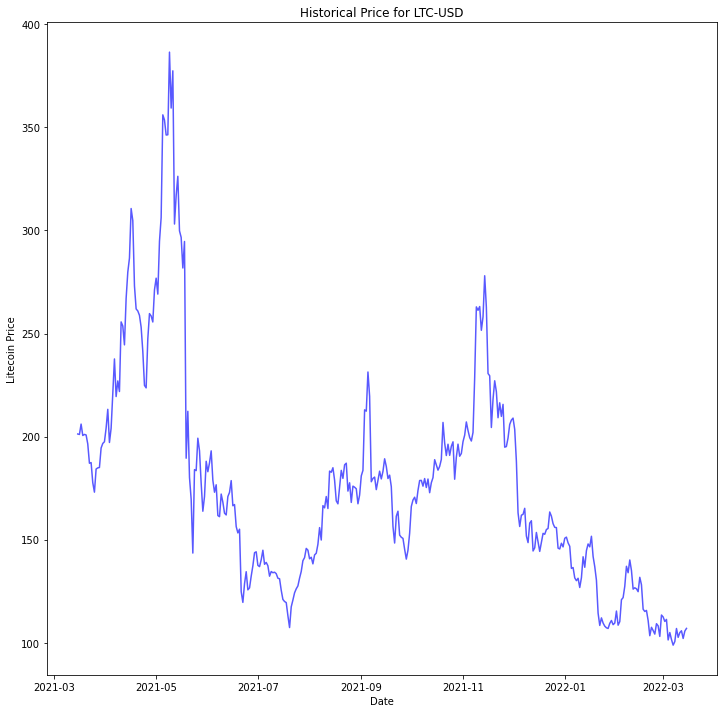

In [10]:
 #To plot the movement of the adjusted closing prices
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
 patches = ax.plot(LTC_Close, alpha=0.65, color='blue')
 #We can see the distribution of the retunrs are normal
ax.set_xlabel('Date')
ax.set_ylabel('Litecoin Price')
ax.set_title('Historical Price for ' + 'LTC-USD')

1.2246288408194443

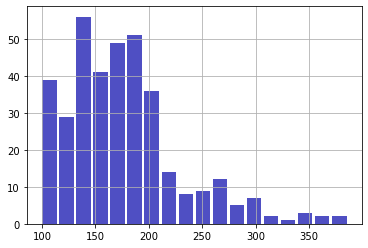

In [11]:
LTC_Close.hist( bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
 #To display the distibutions of the PRICES
LTC_Close.skew() #To see if the distrubtion PRICES is normal or skewed, which we can see the distibution are positvely skewed

### Analysis of the return

In [12]:
LTC_LogRet=np.log(LTC_Close / LTC_Close.shift(1)) #To calculate the lognormal returns of Litecoin

In [13]:
LTC_LogRet.head().round(4) #To display the first 5 days returns, note that the return on March 15 is Not Applicable 
#because we dont have the data of March 14 2021.


Date
2021-03-15       NaN
2021-03-16   -0.0011
2021-03-17    0.0247
2021-03-18   -0.0272
2021-03-19    0.0026
Name: Adj Close, dtype: float64

Text(0.5, 1.0, 'Volatility Clustering of LTC-USD')

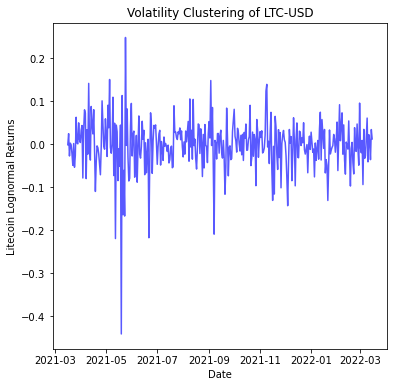

In [14]:
#To plot the movement of the adjusted closing prices
fig, ax= plt.subplots(1, 1, figsize=(6, 6))
patches = ax.plot(LTC_LogRet, alpha=0.65, color='blue')
 #We can see the distribution of the retunrs are normal
ax.set_xlabel('Date')
ax.set_ylabel('Litecoin Lognormal Returns')
ax.set_title('Volatility Clustering of ' + 'LTC-USD')

#### Calculation of Volatility

In [15]:
LTC_LogRet.describe().round(4) #the standard deviation 'std' displayed  is the daily volatility of returns. 

count    365.0000
mean      -0.0017
std        0.0590
min       -0.4412
25%       -0.0303
50%        0.0011
75%        0.0303
max        0.2484
Name: Adj Close, dtype: float64

In [16]:
LTC_DailySTD=np.std(LTC_LogRet) #To calculate and display the standard deviation, or daily volatility of the log returns
LTC_DailySTD

0.05892121491790921

In [17]:
LTC_Sigma=np.sqrt(365)*LTC_LogRet.std() #To Calculate and display the annualized volatility
LTC_Sigma

1.1272334449141146

In [18]:
print('The annualized volatility is', round(LTC_Sigma*100,2),'%' )

The annualized volatility is 112.72 %


Text(0.5, 1.0, 'Histogram of Log returnsLTC-USD')

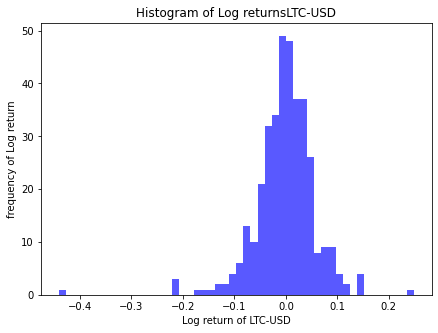

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
n, bins, patches = ax.hist(LTC_LogRet,
    bins=50, alpha=0.65, color='blue')
 #We can see the distribution of the retunrs are normal
ax.set_xlabel('Log return of LTC-USD')
ax.set_ylabel('frequency of Log return')
ax.set_title('Histogram of Log returns' + 'LTC-USD')

# European Put Option

### Derivative Definition

In [23]:
S0 = 110.31             # spot price on March 17, when data was imported 
K = 120              # strike (In coursewrk, we have to set a reasonanle price for the strike price)
T = 1/52                 # maturity (1.0 means one year , as everything is annualized. we have to decide this for the coursework. 1 week is 1/52)
r = 0.00387                # risk free rate from Bloomberg Terminal, GB3GOV
N = 4                   # number of periods or number of time steps  (this mean 3 steps so 4 month), should not be more than 5
payoff = "put"          # payoff 

### Binomial Tree Method

In [24]:
dT = float(T) / N                             # Delta t ( All the values should be float)
u = np.exp(LTC_Sigma * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 
u #Print U


1.081295194352685

In [25]:
d

0.9248168356085665

In [26]:
S = np.zeros((N + 1, N + 1)) # to construct the number of the steps for my tree, and thats a matric
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [27]:
S

array([[110.31      , 119.27767289, 128.97437449, 139.45937133,
        150.79674803],
       [  0.        , 102.01654514, 110.31      , 119.27767289,
        128.97437449],
       [  0.        ,   0.        ,  94.34661845, 102.01654514,
        110.31      ],
       [  0.        ,   0.        ,   0.        ,  87.25334113,
         94.34661845],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         80.69335884]])

In [28]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4805889513241022

#### Option Value at Last  node

In [29]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  9.69      ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 25.65338155],
       [ 0.        ,  0.        ,  0.        ,  0.        , 39.30664116]])

#### Option Value at earlier node, for a European Put

In [30]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V #we are running backwards using brownian motion to find value at earlier nodes

array([[13.39330019,  7.36354799,  2.61414687,  0.        ,  0.        ],
       [ 0.        , 18.9728532 , 11.75823061,  5.03299942,  0.        ],
       [ 0.        ,  0.        , 25.64891625, 17.98122219,  9.69      ],
       [ 0.        ,  0.        ,  0.        , 32.7444262 , 25.65338155],
       [ 0.        ,  0.        ,  0.        ,  0.        , 39.30664116]])

#### European Put Value using Binominial Tree method

In [31]:
print('European ' + payoff+" value is", str( V[0,0]))

European put value is 13.393300187234793


### Monte Carlo Method

In [306]:
def mcs_simulation_np(m,n):       #m is the number of steps and n is the number of simulation
    M = m
    I = n
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - LTC_Sigma ** 2 / 2) * dt + LTC_Sigma * np.sqrt(dt) * rn[t]) 
    return S

In [307]:
S = mcs_simulation_np(90,10000)

In [308]:
S = np.transpose(S) # we are looking for the end value of each tranposed row
S

array([[110.31      , 110.43231115, 112.89090791, ..., 113.59744832,
        113.76148812, 113.07707229],
       [110.31      , 110.01275036, 110.26956401, ..., 103.9635848 ,
        104.59105734, 103.8126007 ],
       [110.31      , 112.6042962 , 114.39008183, ..., 123.87921198,
        120.53099319, 120.51048608],
       ...,
       [110.31      , 110.32797926, 114.59397194, ..., 102.5270034 ,
        103.18025087, 104.76387986],
       [110.31      , 112.16399371, 110.90496758, ..., 128.72619472,
        129.0757771 , 127.8760087 ],
       [110.31      , 110.85641063, 110.44377235, ..., 109.92226942,
        112.61734796, 114.15131508]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

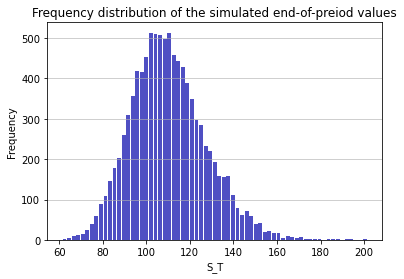

In [309]:
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

#### European Put Value using Monte Carlo Method

In [310]:
p = np.mean(np.maximum(K - S[:,-1],0))*np.exp(-r*T) #We are taking the average oof the 10000 results we have just run.
print('European '+ payoff +" value is", str(p))

European put value is 13.01261343371791


# Black Scholes model

####  Formula

In [311]:
import scipy.stats as si

In [312]:
def euro_option_bs(Spot, Strike, Time, risk, vol, payofftype):
    
    #Spot: spot price
    #Strike: strike price
    #Time: time to maturity
    #risk: risk free rate
    #vol: volatility of underlying asset
    #payofftype: call or put
    
    d1 = (np.log(Spot / Strike) + (r + 0.5 * vol ** 2) * Time) / (vol * np.sqrt(Time))
    d2 = (np.log(Spot / Strike) + (r - 0.5 * vol ** 2) * Time) / (vol * np.sqrt(Time))
    if payofftype == "call":
        option_value = Spot * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-risk * Time) * si.norm.cdf(d2, 0.0, 1.0)
    elif payofftype == "put":
        option_value = - Spot * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-risk * Time) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [313]:
Value = euro_option_bs(S0, K, T, r, LTC_Sigma,payoff)

#### European Put Value with BSM Formula

In [314]:
print("European "+ payoff + " value is "+str(Value))

European put value is 13.013520128412964


#### Mibian Library

In [315]:
import mibian as mb


In [316]:
Value_mb = mb.BS([S0, K, r*100, T*365], volatility = LTC_Sigma*100)


In [317]:
Value_mb.putPrice

13.013520128412964

# Greeks

## Delta

In [318]:
def delta(Spot, Strike, Time, risk,vol, payofftype):
    
    d1 = (np.log(Spot /Strike) + (risk + 0.5 * vol ** 2) * Time) / (vol * np.sqrt(Time))
    if payofftype == "call":
        delta = si.norm.cdf(d1, 0.0, 1.0)
    elif payofftype == "put":
        delta =  - si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [319]:
delta(S0,K,T,r,LTC_Sigma,payoff)

-0.6769137963582199

In [320]:
#For a $1 increase in the Litecoin (S0), the option value will decrease by $0.6769 

In [321]:
SL = np.linspace(70, 170, 51)
Delta = np.zeros((len(SL),1))
for i in range(len(SL)):
        Delta[i] = delta(SL[i], K, T, r, LTC_Sigma, payoff)

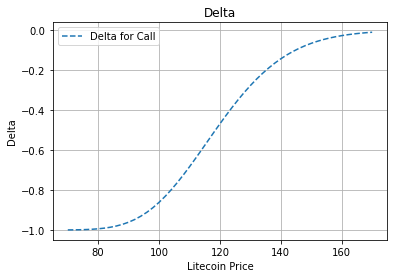

In [322]:
fig = plt.figure()
plt.plot(SL, Delta, '--')
plt.grid()
plt.xlabel('Litecoin Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

In [323]:
SL = np.linspace(70, 170, 51)
TL = np.linspace(T/7, T, 51)
Delta = np.zeros((len(TL),len(SL)))
for j in range(len(SL)):
    for i in range(len(TL)):
        Delta[i,j] = delta(SL[j], K, TL[i], r, LTC_Sigma, payoff)

C:\Users\Abdoul\AppData\Local\Temp/ipykernel_14360/2873808758.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


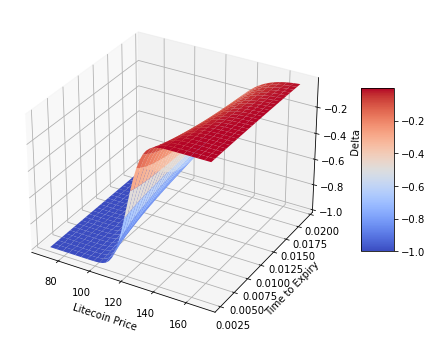

In [324]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
SL, TL = np.meshgrid(SL, TL)
surf = ax.plot_surface(SL, TL, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Litecoin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

#### 

When Litecoin price increasese, the delta increases fast.


AT the money (when Spot= Strike Price), Delta will be around -0.45, in the money (Spot<Strike) delta =-1,


Out the money  delta will be close to zero, so option value not sensitive to the change in underlying.

#### Gamma

In [325]:
def gamma(Spot, Strike, Time, risk, vol):
    
    d1 = (np.log(Spot / Strike) + (risk + 0.5 * vol ** 2) * Time) / (vol * np.sqrt(Time))
    gamma = si.norm.pdf(d1, 0.0, 1.0) / (vol * Spot * np.sqrt(Time))
    
    return gamma

In [371]:
gamma(S0,K,T,r,LTC_Sigma)

0.02082174117953368

In [327]:
#For $1 increase in Litecoin price, the delta will increase by 0.0208217, Delta will be equal to = -0.656092055
#so the Put value will decrease by $0.6560

In [328]:
SL = np.linspace(70, 170, 51)
Gamma = np.zeros((len(SL),1))
for i in range(len(SL)):
        Gamma[i] = gamma(SL[i], K, T, r, LTC_Sigma)

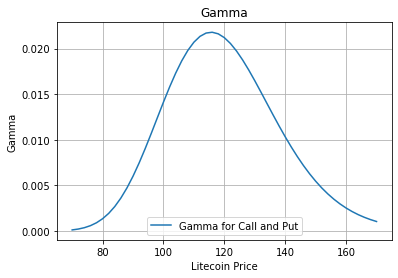

In [329]:
fig = plt.figure()
plt.plot(SL, Gamma, '-')
plt.grid()
plt.xlabel('Litecoin Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

#### 
At the money, Gamma is sensitive.

In the money Gamma sensitivity rapidly decreases. 

Out of the money, Gamma sensitivity decreases slower than in the money

In [330]:
SL = np.linspace(70, 170, 51)
TL = np.linspace(T/7, T, 51)
Gamma = np.zeros((len(TL),len(SL)))
for j in range(len(SL)):
    for i in range(len(TL)):
       Gamma[i,j] = gamma(SL[j], K, TL[i], r, LTC_Sigma)

C:\Users\Abdoul\AppData\Local\Temp/ipykernel_14360/14844831.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


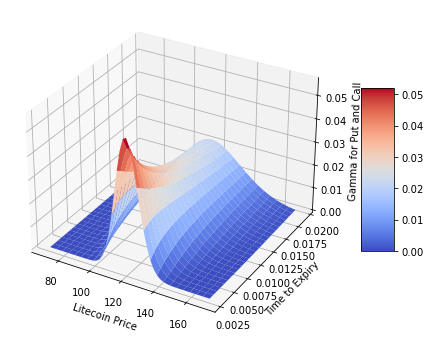

In [331]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
SL, TL = np.meshgrid(SL, TL)
surf = ax.plot_surface(SL, TL, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Litecoin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma for Put and Call')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Theta

In [360]:
def theta(Spot, Strike, Time, risk, vol, payofftype):
    
    d1 = (np.log(Spot / Strike) + (risk + 0.5 * vol ** 2) * Time) / (vol * np.sqrt(Time))
    d2 = (np.log(Spot / Strike) + (risk - 0.5 * vol ** 2) * Time) / (vol * np.sqrt(Time))
    if payofftype == "call":
        theta = vol * Spot  * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(Time)) - risk * Strike * np.exp(-risk * Time) * si.norm.cdf(d2, 0.0, 1.0)
    elif payofftype == "put":
        theta = vol * Spot * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(Time)) + risk * Strike * np.exp(-risk * Time) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [372]:
theta(S0,K,T,r,LTC_Sigma,payoff)

161.9519129744701

In [363]:
TL = np.linspace(T/7,T,12)
Theta_Put = np.zeros((len(TL),1))
for i in range(len(TL)):
    Theta_Put [i] = theta(S0, K, TL[i], r, LTC_Sigma, payoff)

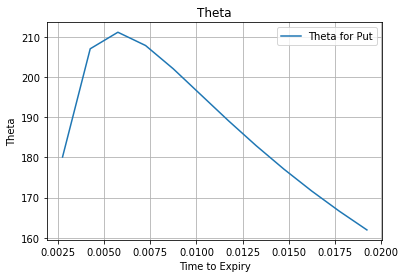

In [364]:
fig = plt.figure()
plt.plot(TL, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

In [365]:
SL = np.linspace(70, 170, 51)
TL = np.linspace(T/7, T, 51)
Theta = np.zeros((len(TL),len(SL)))
for j in range(len(SL)):
    for i in range(len(TL)):
        Theta[i,j] = theta(SL[j], K, TL[i], r, LTC_Sigma, payoff)

C:\Users\Abdoul\AppData\Local\Temp/ipykernel_14360/296200014.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


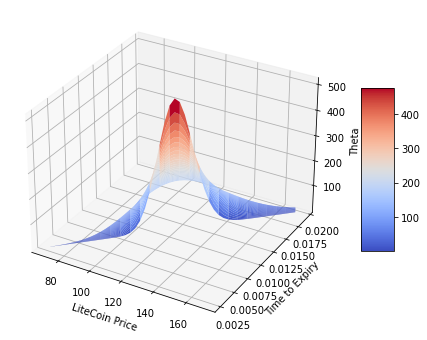

In [366]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(SL, TL)
surf = ax.plot_surface(SL, TL, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('LiteCoin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

## RHO

In [367]:
def rho(Spot, Strike, Time, risk, vol, payofftype):
    
    d1 = (np.log(Spot / Strike) + (risk + 0.5 * vol ** 2) * Time) / (vol * np.sqrt(Time))
    d2 = (np.log(Spot / Strike) + (risk - 0.5 * vol ** 2) * Time) / (vol * np.sqrt(Time))
    if payofftype == "call":
        rho =  Strike * Time * np.exp(-risk * Time) * si.norm.cdf(d2, 0.0, 1.0)
    elif payofftype == "put":
        rho = - Strike * Time * np.exp(-risk * Time) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [373]:
rho(S0,K,T,r,LTC_Sigma,payoff)

-1.6862284808593884

In [380]:
RL = np.linspace(0,0.05,50)
Rho_Put = np.zeros((len(RL),1))
for i in range(len(RL)):
    Rho_Put [i] = rho(S0, K, T, RL[i],LTC_Sigma,payoff)

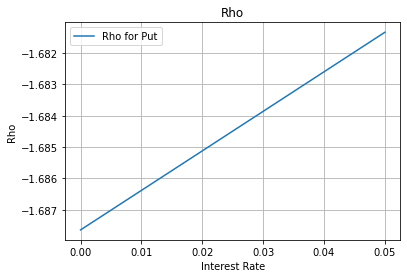

In [381]:
fig = plt.figure()
plt.plot(RL, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend([ 'Rho for Put'])

In [ ]:
RL = np.linspace(0, 0.05, 51)
TL = np.linspace(T/7, T, 51)
Theta = np.zeros((len(TL),len(SL)))
for j in range(len(SL)):
    for i in range(len(TL)):
        Theta[i,j] = theta(SL[j], K, TL[i], r, LTC_Sigma, payoff)

## Vega

In [185]:
def vega(Spot, Strike, Time, risk, vol):
    
    d1 = (np.log(Spot / Strike) + (risk  + 0.5 * vol ** 2) * Time) / (vol * np.sqrt(Time))
    vega = Spot * np.sqrt(Time) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [186]:
vega(S0,K,T,r,LTC_Sigma)

5.492339000186225

In [192]:
vol = np.linspace(0.5,20,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(S0, K, T, r, vol[i])

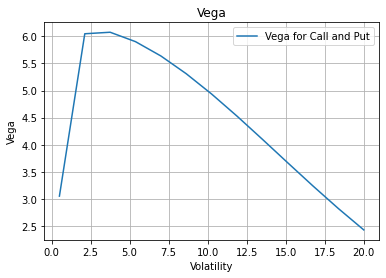

In [193]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])